# Расчет продуктовых метрик. CTR, CPC

## Описание данных

+ ad_id                идентификатор объявления (рекламы)
+ xyz_campaign_id      идентификатор рекламной кампании в базе компании X
+ fb_campaign_id       идентификатор кампании в Facebook
+ age                  возрастная группа, которой показывалась реклама
+ gender               пол тех, кому показывалась реклама
+ interest             код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес)
+ impressions          число показов
+ clicks               число кликов
+ spent                сумма, которую компания потратила на показ объявления 
+ total_conversion     количество людей, которые заинтересовались продуктом после просмотра рекламы
+ approved_conversion  количество людей, которые купили продукт после просмотра рекламы

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/пк/Dolzhenkov_Jupyter/Statistics/Lesson_2/conversion.csv')

In [3]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


## Первичный анализ данных

In [4]:
# число наблюдений и столбцов
df.shape

(1143, 11)

In [5]:
# типы данных
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [6]:
# наличие пропущенных значений
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [7]:
# Количесвто реклам каждой рекламной компании
df.xyz_campaign_id.value_counts()

1178    625
936     464
916      54
Name: xyz_campaign_id, dtype: int64

In [8]:
# Количесвто проведенных уникальных рекламных компаний
df.xyz_campaign_id.nunique()

3

In [9]:
df.age.value_counts()

30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64

## Построение распределения числа показам по компаниям в Facebook


Построим график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) 
для каждой рекламной компании в Facebook, прологарифмировав значения.

In [10]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [11]:
# Количество уникальных рекламных команий в Facebook
df.fb_campaign_id.nunique()

691

In [12]:
df_fb = np.log(df.groupby('fb_campaign_id').agg({'Impressions':'sum'}))
df_fb.head()

,Impressions
fb_campaign_id,
103916,8.902456
103917,9.790375
103920,6.541030
103928,9.035034
103929,7.557473


C:\Dima\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

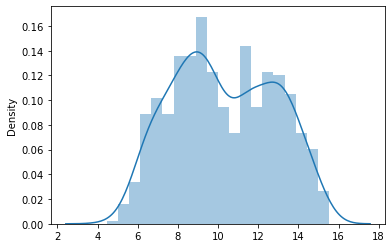

In [13]:
# Распределения числа показов для каждой рекламной кампании в Facebook
# Распределение является не нормальным, и бимодальным
sns.distplot(df_fb, bins=20)

## Расчет и анализ CTR

### Расчте CTR

In [14]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [15]:
df['CTR'] = df.Clicks / df.Impressions
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242


In [16]:
# Проверяем на CTR на NaN
df.CTR.isna().sum()

0

In [17]:
# Найдем ad_id объявления с наибольшим CTR
df.sort_values(by='CTR', ascending = False).head(1)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059


#### Описательные статистики CTR

In [18]:
df.CTR.mean()

0.0001641967130599648

In [19]:
df.CTR.mode()

0    0.0
dtype: float64

In [20]:
df.CTR.median()


0.00015980898126474708

In [21]:
# Дисперсия
df.CTR.var()

1.3238038411715261e-08

In [22]:
# Стандартное отклонение
df.CTR.std()

0.00011505667478123667

In [23]:
# IQR - -межквантильный размах
scipy.stats.iqr(df.CTR)

0.0001334143888399813

In [24]:
df.CTR.describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: CTR, dtype: float64

### Визуализация CTR

Визуализируем CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). Посмотрим на распределение CTR кампании 916?

In [25]:
df_CTR_916 = df.query('xyz_campaign_id == 916')

C:\Dima\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CTR'>

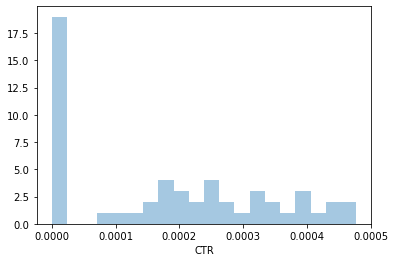

In [26]:
sns.distplot(df_CTR_916['CTR'], bins=20 ,kde = False)

## Расчет и анализ CPC (cost-per-click)

### Расчет CPC

In [27]:
df['CPC'] = df.Spent / df.Clicks
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29


In [28]:
# Проверяем на CPC на NaN
df.CPC.isna().sum()

207

#### Описательные характеристики

In [29]:
df.CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

In [30]:
# IQR - межквантильный размах
scipy.stats.iqr(df.CPC, nan_policy='omit').round(2)

0.25

### Визуализация CPC

Визуализируем CPC с разбивкой по полу пользователей, которым были показаны объявления

In [31]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29


C:\Dima\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Dima\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


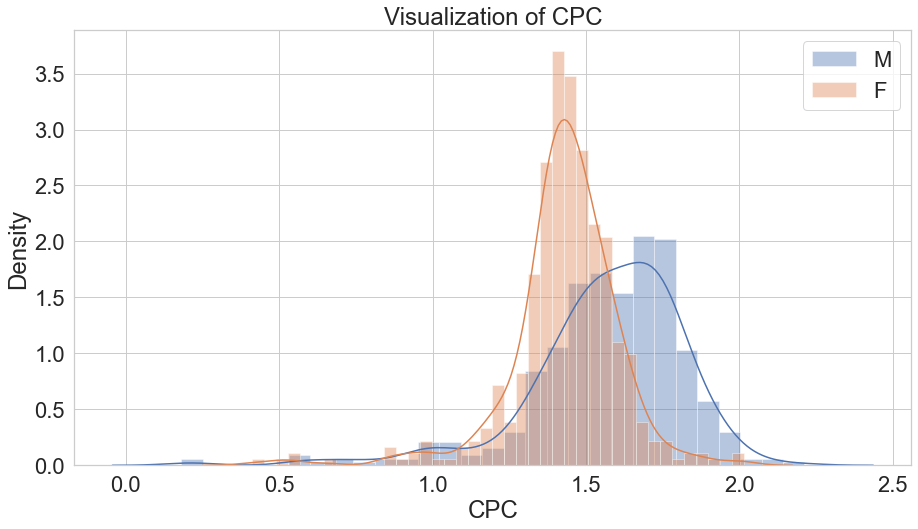

In [32]:
sns.set(font_scale = 2,
        style      = 'whitegrid',
        rc         = {'figure.figsize':(15,8)})

x_M = df.dropna().query('gender == "M"')['CPC']
y_F = df.dropna().query('gender == "F"')['CPC']

ax = sns.distplot(x_M, label='M')
ax = sns.distplot(y_F, label='F')

ax.set_title('Visualization of CPC')

ax.legend()


## Расчет конверсии клика в покупку (CR - convertion rate)

In [33]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29


In [34]:
# Расчет CR в %
df['CR'] = round(df.Approved_Conversion/df.Clicks * 100, 2)

In [35]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43,100.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29,100.0


In [36]:
#Посмотрим на конверсию пользователя 1121814
df[df.ad_id == 1121814]

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CR
860,1121814,1178,144659,30-34,F,27,2223278,421,612.300003,38,13,0.000189,1.454394,3.09
